# Data Preparation

The dataset has been cleaned according to our README.md, and is ready to be analysed. The process of data cleaning is found in the data_engineering.ipynb notebook.

In [1]:
import pandas as pd

from DataExploration import *
from DataExploration import descriptive_statistics as ds
from DataExploration import plots as pl
import ShowLinearRegression as slr
import ShowClassification as sc
import ShowClustering.clustering as scc

In [2]:
df = pd.read_csv("data/cleaned_sales_data.csv")

In [3]:
ds.describe_data(df, verbose=False, round_digits=2)

,count,mean,std,min,25%,50%,75%,max
feature,,,,,,,,
datetime,8950,NaN,NaN,NaN,NaN,NaN,NaN,NaN
day_of_week,8950,4.631285,1.648495,2.0,3.0,5.0,6.0,7.0
order_id,8950,14187.461341,6945.131456,913.0,7803.25,16092.5,20381.75,24712.0
order_total,8950,379.735592,281.788275,-623.0,238.0,323.0,456.0,5229.0
sales_channel,8950,2.192514,0.801949,1.0,2.0,2.0,3.0,3.0
number_of_maindishes,8950,2.178492,2.190671,-5.0,1.0,2.0,2.0,43.0
number_of_snacks,8950,0.881341,1.356026,-4.0,0.0,0.0,1.0,16.0
number_of_drinks,8950,0.748939,2.548389,-3.0,0.0,0.0,1.0,53.0
number_of_soups,8950,0.101453,0.380829,0.0,0.0,0.0,0.0,5.0


Here is a general simple overview of our dataset. 'order_id' is irrelevant because it is an ID and thus should have no influence on our analysis. 'datetime' is also removed as it is not an Integer and only the day of the week is relevant for the analysis.

In [4]:
df = df.drop(['datetime', 'order_id'], axis=1, inplace=False)

The descriptive data table show negative values. These identified and removed as seen below.

In [5]:
# Show all rows where any value is negative
df[df.lt(0).any(axis=1)]

,day_of_week,order_total,sales_channel,number_of_maindishes,number_of_snacks,number_of_drinks,number_of_soups,number_of_extras,is_takeaway
171,6,-38.0,3,0.0,0.0,-1.0,0.0,0.0,0
708,7,-410.0,3,-2.0,-4.0,0.0,0.0,0.0,0
2359,5,-118.0,3,0.0,-1.0,-1.0,0.0,0.0,0
2415,6,-298.0,3,-2.0,0.0,0.0,0.0,0.0,0
2796,3,-39.0,3,-1.0,0.0,0.0,0.0,0.0,0
3423,6,-69.0,3,0.0,-1.0,0.0,0.0,0.0,0
3442,7,-69.0,3,0.0,-1.0,0.0,0.0,0.0,0
4842,6,-506.0,3,-2.0,-2.0,-2.0,0.0,-2.0,0
6671,7,-623.0,3,-5.0,-2.0,0.0,0.0,0.0,0
6759,3,-119.0,3,-1.0,0.0,0.0,0.0,0.0,0


In [6]:
df = df.drop(df[df.lt(0).any(axis=1)].index)

## Data Analysis

In this section Whiskers Plot, Histograms and Correlation Heatmap is shown in order to understand the data, and to identify whether normal distribution is present, if there are any outliers and if there is correlation between columns.  

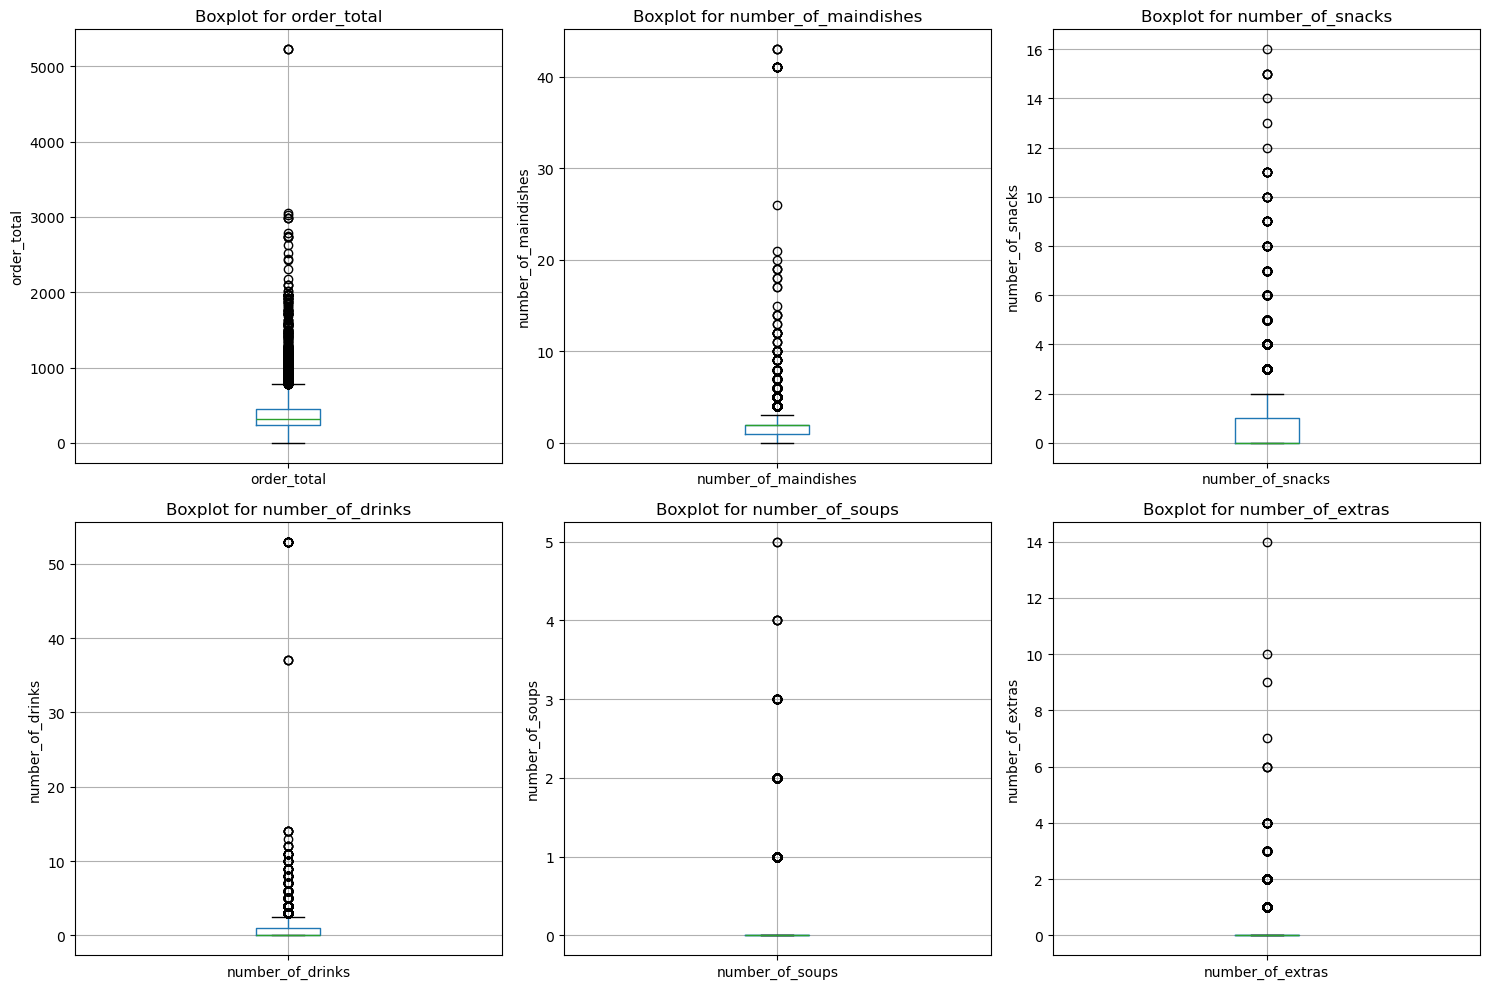

In [7]:
fig = pl.show_boxplots(df[['order_total', 'number_of_maindishes', 'number_of_snacks', 'number_of_drinks', 'number_of_soups', 'number_of_extras']], layout='grid')

Whiskers plot have been made for the coloumns that are not categorical data.
Looking at the Whiskers plot it is clear that the amount of soups and extras sold by the restaurant are so few, that it has no impact on the analysis.
In number_of_drinks, number_of_maindishes and order_total there are outliers that are significantly higher than the other values. These outliers are attempted removed in the codeblock below.

Outliers from the maindishes column are removed below using the inter quantile range * 2. The reason it is used on maindishes and not order_total, is because order_total is dependant on maindishes, and thus removing outliers from maindishes should also remove the outliers from order_total without removing more entries than nescessary.

In [8]:
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['number_of_maindishes'].quantile(0.25)
Q3 = df['number_of_maindishes'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1

# Calculate 2 * IQR
outlier_threshold = 2 * IQR
no_outlier_df = df[df['number_of_maindishes'] <= (Q3 + outlier_threshold)]

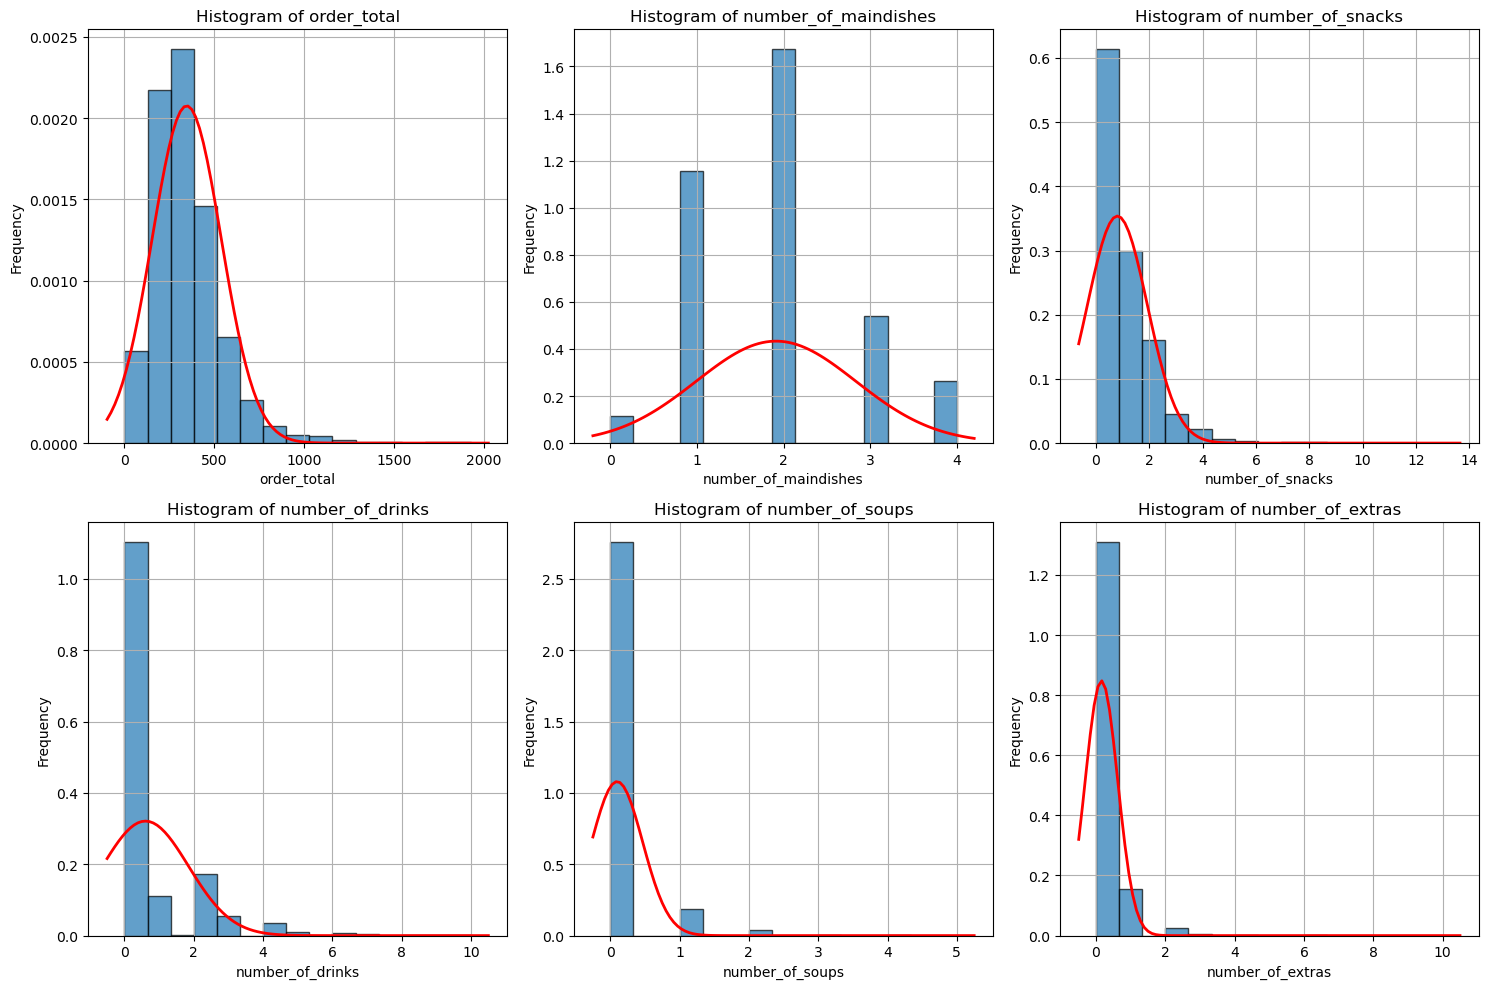

In [9]:
fig = pl.show_histograms(no_outlier_df[['order_total', 'number_of_maindishes', 'number_of_snacks', 'number_of_drinks', 'number_of_soups', 'number_of_extras']], layout='grid', bell_curve=True, bins=15)

Looking at the histogram the distributions looks mostly positively skewed, where maindishes are slightly positively skewed, but close to normally distributed.

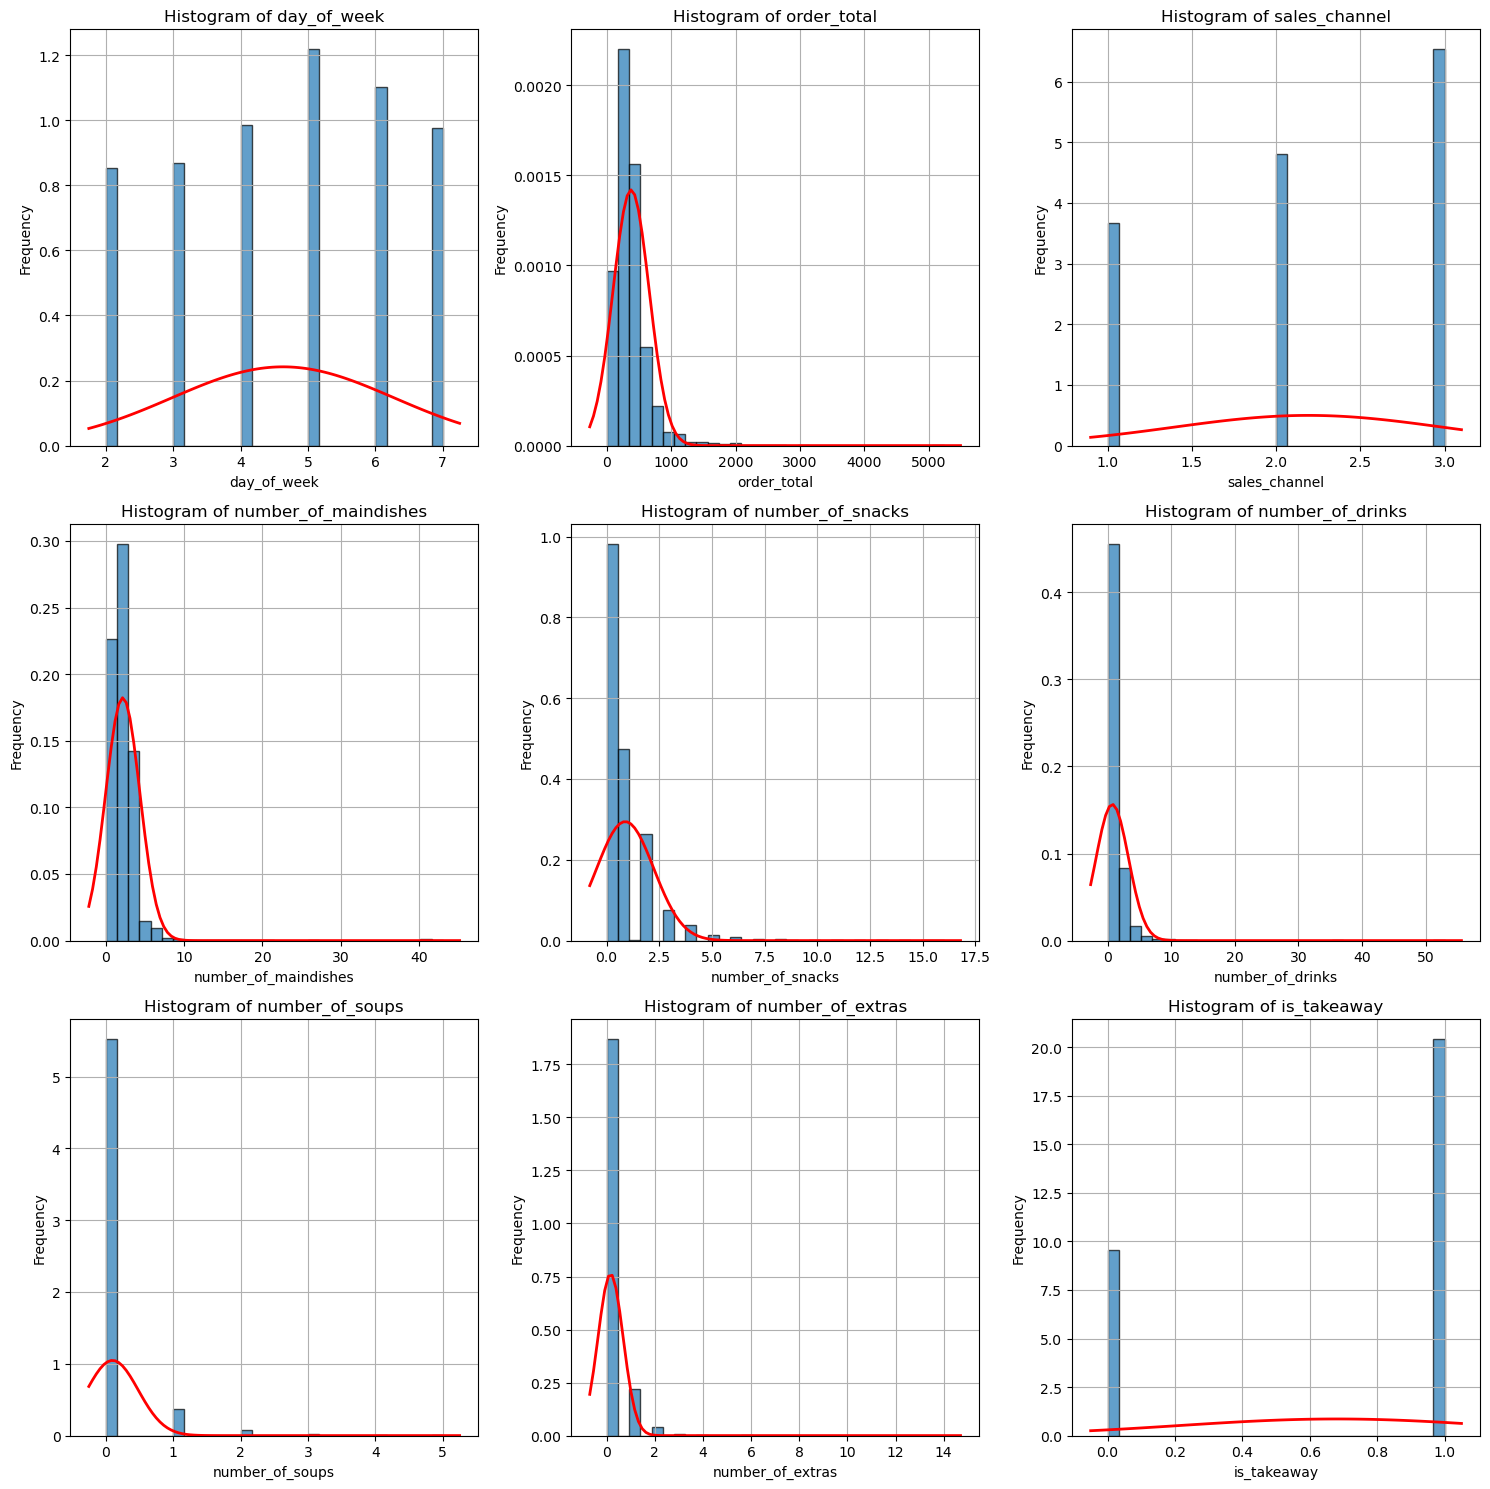

In [10]:
fig = pl.show_histograms(df, layout='grid', bell_curve=True, bins=30)

When looking at the histogram of the dataframe included outliers, no normal distribution is observed.

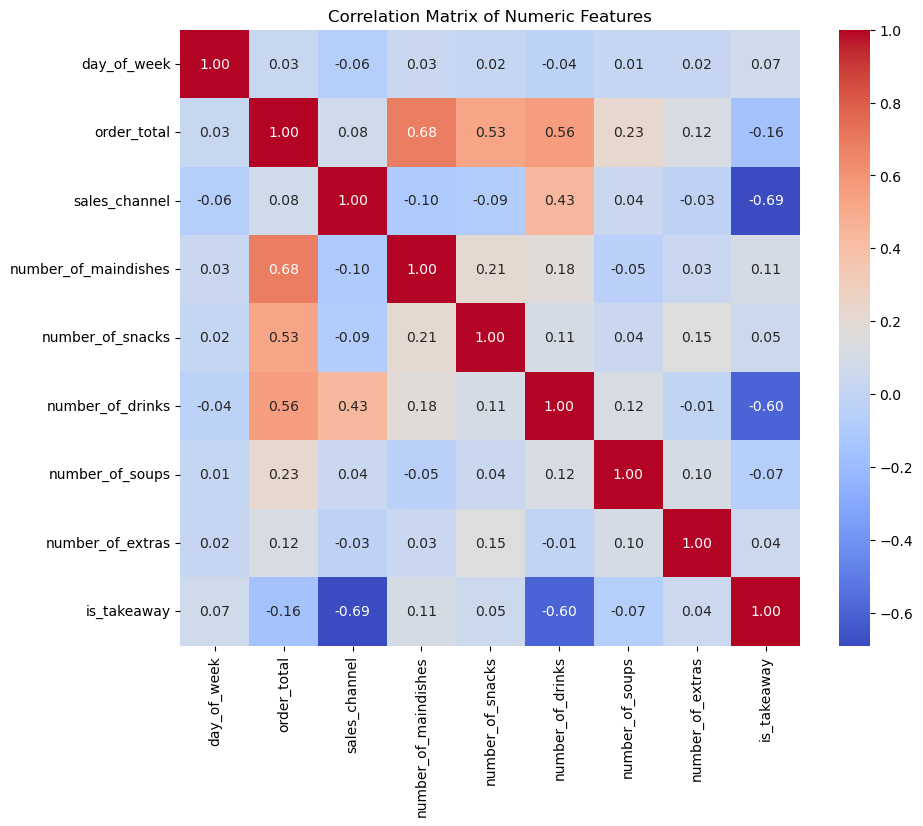

In [11]:
fig = pl.show_correlation_heatmap(no_outlier_df)

Looking at the correlation heatmap order_total correlates to snacks, drinks and maindishes.
Looking at is_takeaway it correlates to, sales channel and drinks.

As seen in the plots above, no normal distribution was found. According to the problem statement a hypothesis between a prediction on number of drinks ordered and maindishes has been posed.
Therefore an attempt to make a model using multiple linear regression has been made below where the dependant variable is number_of_drinks, and independant variables are number_of_maindishes, number_of_snacks, is_takeaway, sales_channel and order_total.

## Linear Regression

Multiple linear regression have been made in order to shape a model that can predict when customers will order an extra drink.

In [12]:
lin = slr.show_model(no_outlier_df, ['number_of_maindishes', 'number_of_snacks', 'is_takeaway', 'sales_channel', 'order_total'], ['number_of_drinks'], test_size=0.2, random_state=42)

The model is a hyperplane:
	y = -0.40*number_of_maindishes + -0.27*number_of_snacks + -1.03*is_takeaway + 0.08*sales_channel + 0.01*order_total + 0.25
Mean Absolute Error  0.46966125833095734
Mean Squared Error  0.5080210388008947
Root Mean Squared Error  0.7127559461701423
Explained variance score  0.64
R2 score  0.6396541293558381


A variance and r2 score of 64% confirms that using linear regression on a positively skewed attribute is not optimal.

## Classification

In this section a model that predicts sales channels has been developed using the supervised model, decision tree.

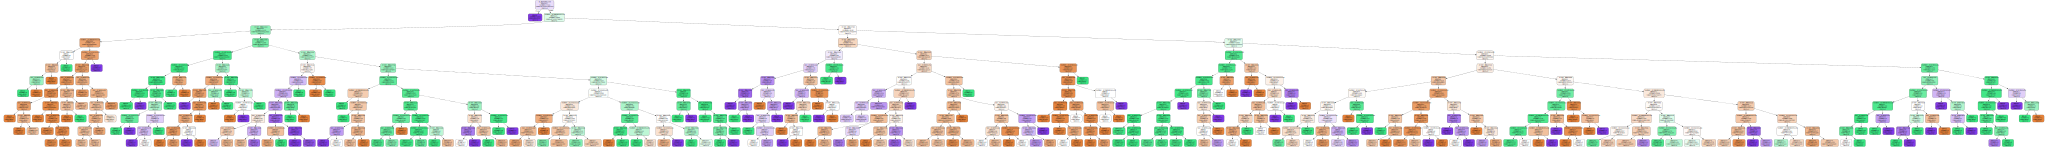

Accuracy: 0.808165548098434


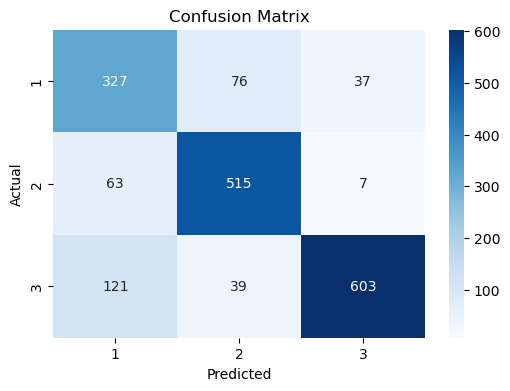

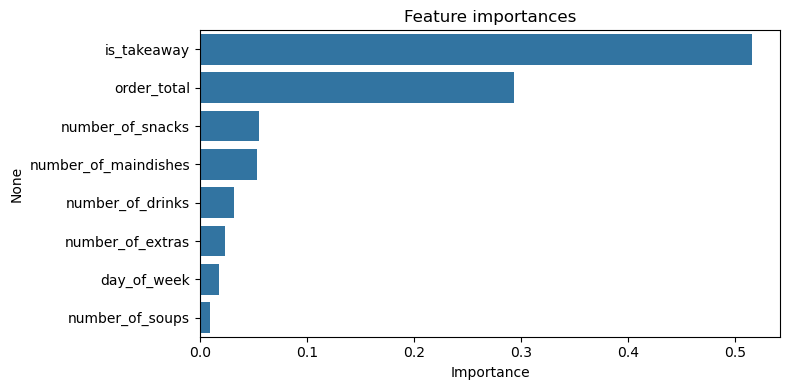

In [13]:
cl= sc.show_decision_tree(df, 'sales_channel', max_depth=11)


Reading the confusion matrix:
- 1 = Mealo
- 2 = Wolt
- 3 = In-House

The confusion matrix shows the model is having difficulties predicting Mealo. Further it is seen that while looking at In-House the model is predicting orders to belong to Mealo, more than option Wolt. This indicates that the customers ordering their food through the restaurants website, is closer to the orders made In-House.

## Clustering

This section groups individual orders into natural behavioral segments. No labels were provided to the model; it discovered patterns on its own.

As seen log1p has been applied to compress larger values, so very big orders don't dominate distances in clustering.

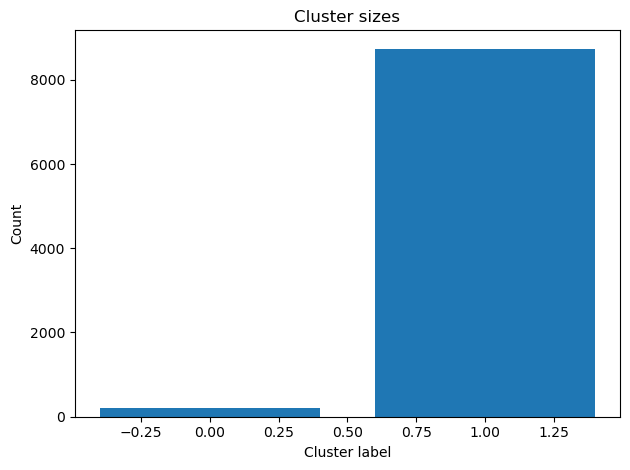

In [14]:
clustering_results = scc.show_cluster_sizes(df)

As seen here, is a count of orders in each cluster. the height of each bar is the number of orders assigned to that segment. There is 1 larger segment and 1 smaller segment. This shows that demand is highly concentrated in a single behavior pattern, with one distinct but low volume alternative.

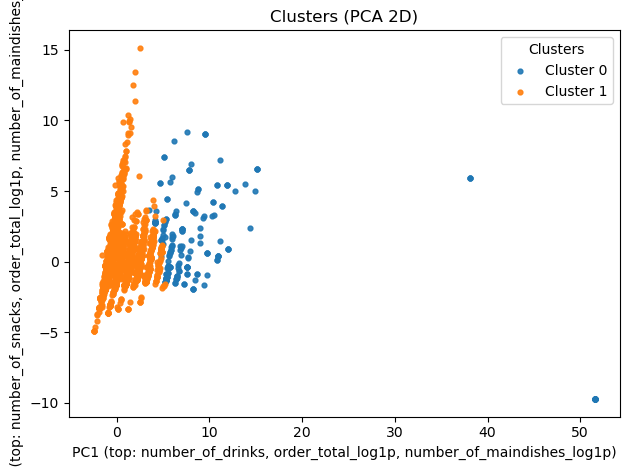

In [15]:
res, X, fig = scc.show_pca_scatter_2d(df)

Here each dot is an order, wich is colored by the respective cluster. Using principal components, we project all features into two axes, *PC1* and *PC2*.

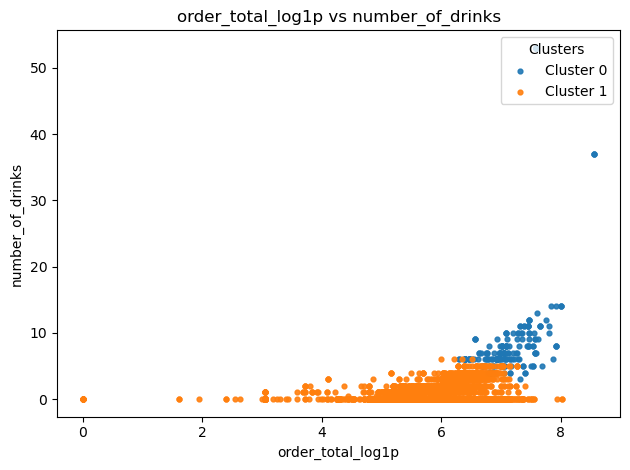

In [16]:
res, X, fig = scc.show_feature_scatter_2d(df,'order_total_log1p','number_of_drinks',)

this shows the direct relationship between spend(x-axis) and drinks(y-axis). <br>the x-axis uses the log1p =  ```
ln(1 + order_total)```
. <br>Dots further right are highspend orders. Dots higher up have more drinks. 

log1p scale:
- x = 6 ≈ 403,- (```exp(6)-1```)
- x = 7 ≈ 1097,-
- x = 8 ≈ 2981,-

what we see:<br>Orange cluster: many orders with 0-6 drinks and moderate spend - everyday, smaller basket.<br>Blue cluster: clearly drink heavy and high spend - party or event behavior.